# Job Placement Dataset

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv("Job_Placement_Data.csv") #https://www.kaggle.com/datasets/ahsan81/job-placement-dataset

### EDA

In [19]:
df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,0,58.00,1,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,1,77.48,1,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,2,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,1,52.00,1,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,0,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,0,77.60,0,0,91.0,0,74.49,1
211,1,58.00,1,60.00,1,1,72.00,1,0,74.0,0,53.62,1
212,1,67.00,1,67.00,1,0,73.00,0,1,59.0,0,69.72,1
213,0,74.00,1,66.00,1,0,58.00,0,0,70.0,1,60.23,1


In [4]:
df.isnull().sum() #We examine the empty lines.

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [6]:
df["ssc_board"].value_counts()

Central    116
Others      99
Name: ssc_board, dtype: int64

In [7]:
df["hsc_board"].value_counts()

Others     131
Central     84
Name: hsc_board, dtype: int64

In [8]:
df["hsc_subject"].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_subject, dtype: int64

In [9]:
df["undergrad_degree"].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: undergrad_degree, dtype: int64

In [10]:
df["specialisation"].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [11]:
df["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

### Feature Engineering

In [12]:
df["ssc_board"]=df["ssc_board"].map({"Central":0,"Others":1}) #We replace the data in ssc_board with 0 and 1.
df['ssc_board']=df['ssc_board'].astype(int) #We change the type of ssc_board to integer.
df["hsc_board"]=df["hsc_board"].map({"Central":0,"Others":1})
df['hsc_board']=df['hsc_board'].astype(int)
df["gender"]=df["gender"].map({"F":0,"M":1})
df['gender']=df['gender'].astype(int)
df["status"]=df["status"].map({"Not Placed":0,"Placed":1})
df['status']=df['status'].astype(int)
df["work_experience"]=df["work_experience"].map({"No":0,"Yes":1})
df['work_experience']=df['work_experience'].astype(int)
df["hsc_subject"]=df["hsc_subject"].map({"Commerce":0,"Science":1,"Arts":2})
df['hsc_subject']=df['hsc_subject'].astype(int)
df["undergrad_degree"]=df["undergrad_degree"].map({"Comm&Mgmt":0,"Sci&Tech":1,"Others":2})
df['undergrad_degree']=df['undergrad_degree'].astype(int)
df["specialisation"]=df["specialisation"].map({"Mkt&Fin":0,"Mkt&HR":1})
df['specialisation']=df['specialisation'].astype(int)

### Data Visualization 

C:\Users\mehme\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


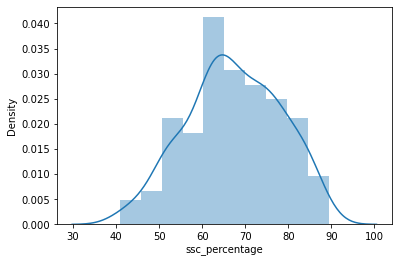

In [13]:
sns.distplot(df['ssc_percentage']);

C:\Users\mehme\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


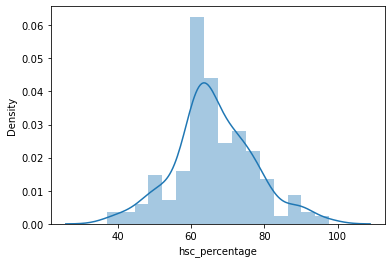

In [14]:
sns.distplot(df['hsc_percentage']);

C:\Users\mehme\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


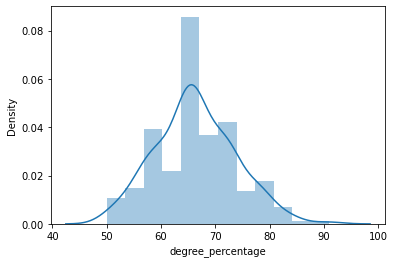

In [15]:
sns.distplot(df['degree_percentage']);

C:\Users\mehme\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


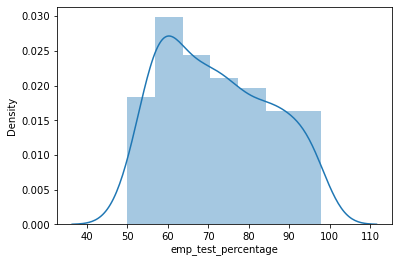

In [16]:
sns.distplot(df['emp_test_percentage']);

C:\Users\mehme\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


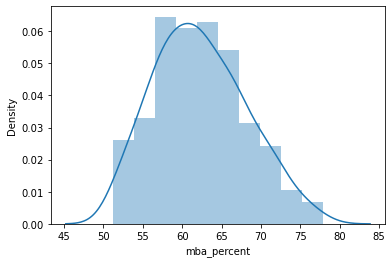

In [17]:
sns.distplot(df['mba_percent']);

In [18]:
abs(df.corr()["status"].sort_values(ascending=False)) #We look at their correlations.

status                 1.000000
ssc_percentage         0.607889
hsc_percentage         0.491228
degree_percentage      0.479861
work_experience        0.276060
emp_test_percentage    0.127639
gender                 0.090670
mba_percent            0.076922
ssc_board              0.037297
hsc_board              0.016945
hsc_subject            0.047179
undergrad_degree       0.082294
specialisation         0.250655
Name: status, dtype: float64

### Classification

In [26]:
x,y=df[["ssc_percentage","hsc_percentage","degree_percentage","work_experience","specialisation"]],df[["status"]]
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)
x_sm=scaler.fit_transform(x_sm)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.20,random_state=42)

In [28]:
x.shape

(215, 5)

In [47]:
model=Sequential()
model.add(Dense(5,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(3,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics="accuracy")

In [48]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=10,epochs=500,verbose=1)
model.summary()

Epoch 1/500
24/24 [==============================] - 1s 8ms/step - loss: 0.6849 - accuracy: 0.5127 - val_loss: 0.6851 - val_accuracy: 0.4333
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.5169 - val_loss: 0.6712 - val_accuracy: 0.4333
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.6017 - val_loss: 0.6776 - val_accuracy: 0.4667
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.6822 - val_loss: 0.6856 - val_accuracy: 0.6167
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5867 - accuracy: 0.7331 - val_loss: 0.6785 - val_accuracy: 0.6667
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7415 - val_loss: 0.6696 - val_accuracy: 0.6667
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.7585 - val_loss: 0.6755 - val_accuracy: 0.6833
Epoch 8/500
2

Epoch 59/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8644 - val_loss: 0.8880 - val_accuracy: 0.7167
Epoch 60/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8686 - val_loss: 0.8427 - val_accuracy: 0.7500
Epoch 61/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8686 - val_loss: 0.9323 - val_accuracy: 0.7333
Epoch 62/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8729 - val_loss: 0.8975 - val_accuracy: 0.7333
Epoch 63/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8686 - val_loss: 0.9082 - val_accuracy: 0.7167
Epoch 64/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8771 - val_loss: 0.9088 - val_accuracy: 0.7333
Epoch 65/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3506 - accuracy: 0.8729 - val_loss: 0.8965 - val_accuracy: 0.7500
Epoch 

24/24 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.8729 - val_loss: 1.4096 - val_accuracy: 0.7667
Epoch 174/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8729 - val_loss: 1.0968 - val_accuracy: 0.7833
Epoch 175/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8941 - val_loss: 1.3570 - val_accuracy: 0.7500
Epoch 176/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8814 - val_loss: 1.2646 - val_accuracy: 0.7667
Epoch 177/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8686 - val_loss: 1.1750 - val_accuracy: 0.7667
Epoch 178/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.9068 - val_loss: 1.2574 - val_accuracy: 0.7667
Epoch 179/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.8771 - val_loss: 1.2013 - val_accuracy: 0.7833
Epoch 180/500

24/24 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.8983 - val_loss: 1.6827 - val_accuracy: 0.7667
Epoch 288/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.9025 - val_loss: 1.8671 - val_accuracy: 0.7833
Epoch 289/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8644 - val_loss: 1.6609 - val_accuracy: 0.7667
Epoch 290/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.8729 - val_loss: 1.5385 - val_accuracy: 0.7833
Epoch 291/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2871 - accuracy: 0.9025 - val_loss: 1.5972 - val_accuracy: 0.8000
Epoch 292/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8983 - val_loss: 1.7429 - val_accuracy: 0.7667
Epoch 293/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8941 - val_loss: 1.6786 - val_accuracy: 0.7667
Epoch 294/500

24/24 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.9068 - val_loss: 2.1580 - val_accuracy: 0.8000
Epoch 402/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.8983 - val_loss: 2.3020 - val_accuracy: 0.7833
Epoch 403/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.8941 - val_loss: 2.3233 - val_accuracy: 0.7833
Epoch 404/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.8983 - val_loss: 2.3631 - val_accuracy: 0.7667
Epoch 405/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2665 - accuracy: 0.8983 - val_loss: 2.3509 - val_accuracy: 0.7833
Epoch 406/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2610 - accuracy: 0.9025 - val_loss: 2.3095 - val_accuracy: 0.8000
Epoch 407/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.8941 - val_loss: 2.4635 - val_accuracy: 0.7667
Epoch 408/500

In [50]:
scores=model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 2.5629 - accuracy: 0.7667


In [51]:
def classification_funct(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    algos=[g,b,KN,D,R,Log,XGBC]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)

In [52]:
classification_funct(x_sm,y_sm)

(236, 5) (60, 5) (236, 1) (60, 1)


C:\Users\mehme\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mehme\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mehme\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mehme\AppData\Local\Temp\ipykernel_20540\4131164786.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.909091,0.882353,0.937500,0.900000
XGBClassifier,0.861538,0.823529,0.903226,0.850000
KNeighborsClassifier,0.843750,0.794118,0.900000,0.833333
GaussianNB,0.818182,0.794118,0.843750,0.800000
LogisticRegression,0.818182,0.794118,0.843750,0.800000
DecisionTreeClassifier,0.812500,0.764706,0.866667,0.800000
BernoulliNB,0.603774,0.470588,0.842105,0.650000
